# Monthly Mean Sunspot Number – Cycle Analysis & Visualization

**Student:** Aryan Dhiman  
**Course:** CSU1658 – Statistical Foundation of Data Sciences  
**Date:** November 2025

---

## Assignment Steps

1. Plot sunspot data over years
2. Model cycles with gamma distribution (reset every 12 years)
3. Histogram of counts
4. MNMC for groups (first 50, all, last 50)
5. Visualize traces (a and b) and their histograms – simulate burn-out
6. Predict cycle peaks (timing of a and b)


In [1]:
# 1. Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gamma
from scipy.signal import find_peaks

## Step 1: Load Data & Plot over Years

Sunspot data (`SN_m_tot_V2.0.csv`) is publicly available from SIDC. Columns:
Year | Month | FracDate | SunspotNum | StdDev | ObsNum | Definitive

We'll parse and plot the time series.


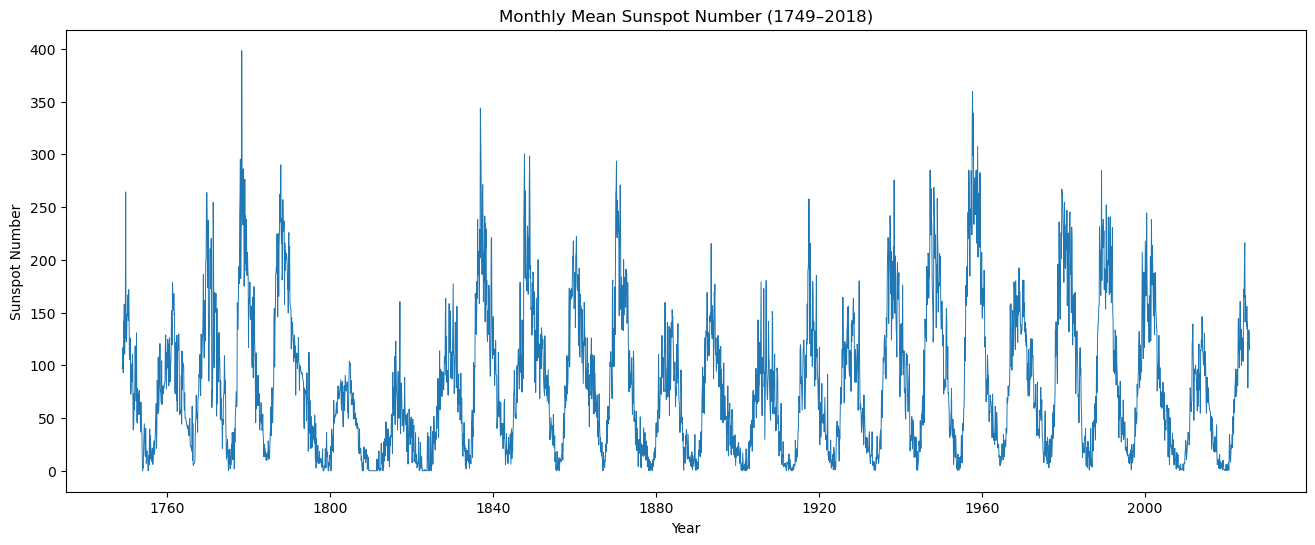

In [3]:
df = pd.read_csv('SN_m_tot_V2.0.csv', sep=';', header=None,
                 names=['Year', 'Month', 'FracDate', 'SunspotNum', 'StdDev', 'ObsNum', 'Definitive'])
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str))
plt.figure(figsize=(16,6))
plt.plot(df['Date'], df['SunspotNum'], lw=0.7)
plt.title('Monthly Mean Sunspot Number (1749–2018)')
plt.xlabel('Year')
plt.ylabel('Sunspot Number')
plt.show()

## Step 2: Gamma Distribution Modeling — 12 Year Cycles

The 11-year solar cycle will be approximated with 12*12 months = 144 months.
For each cycle, fit a gamma distribution and plot.

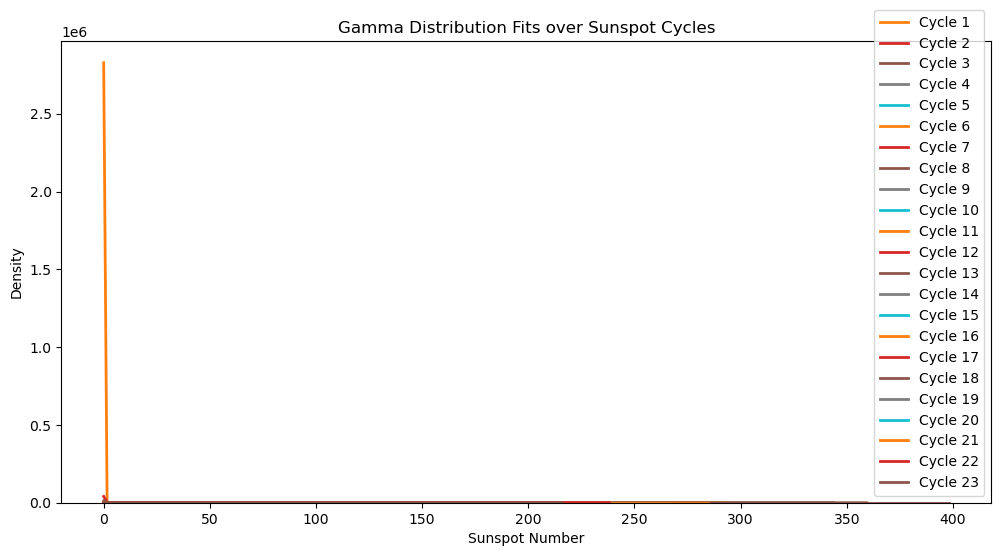

In [4]:
cycle_len = 12 * 12  # months in 12 years
N = len(df)
cycles = N // cycle_len

plt.figure(figsize=(12,6))
for i in range(cycles):
    data_cycle = df['SunspotNum'][i*cycle_len:(i+1)*cycle_len]
    ag, locg, scaleg = gamma.fit(data_cycle)
    xs = np.linspace(data_cycle.min(), data_cycle.max(), 100)
    plt.hist(data_cycle, bins=20, density=True, histtype='step', alpha=0.5)
    plt.plot(xs, gamma.pdf(xs, ag, locg, scaleg), lw=2, label=f'Cycle {i+1}')
plt.legend()
plt.title('Gamma Distribution Fits over Sunspot Cycles')
plt.xlabel('Sunspot Number')
plt.ylabel('Density')
plt.show()

## Step 3: Histogram of All Sunspot Counts

Shows overall distribution of sunspot activity.

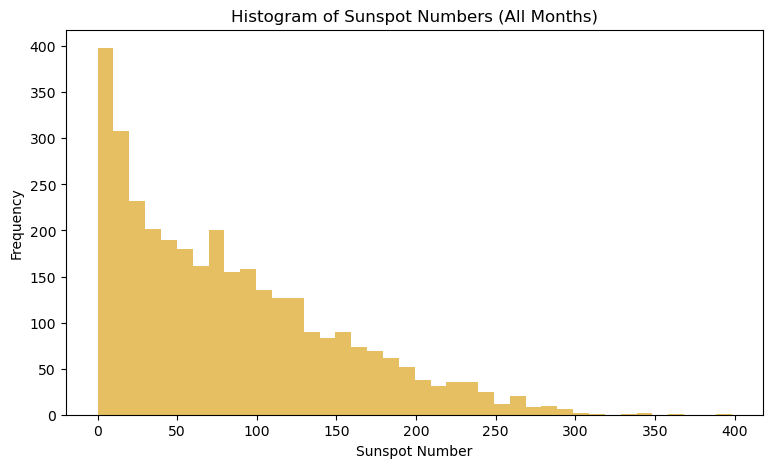

In [5]:
plt.figure(figsize=(9,5))
plt.hist(df['SunspotNum'], bins=40, color='goldenrod', alpha=0.7)
plt.title('Histogram of Sunspot Numbers (All Months)')
plt.xlabel('Sunspot Number')
plt.ylabel('Frequency')
plt.show()

## Step 4: MNMC for Groups — First 50, All, Last 50 Samples

Compares rolling mean trends for different sample groups.

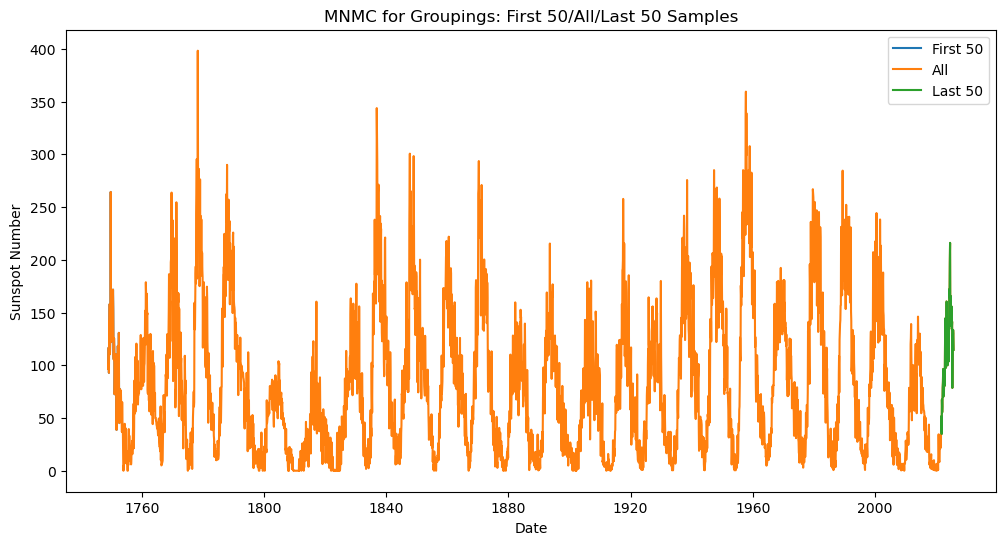

In [6]:
def plot_mnmc_groups(df, n=50, title=''):
    plt.figure(figsize=(12,6))
    groups = [
        df.iloc[:n],            # First 50
        df,                     # All samples
        df.iloc[-n:]            # Last 50
    ]
    for idx, g in enumerate(groups):
        plt.plot(g['Date'], g['SunspotNum'], label=['First 50', 'All', 'Last 50'][idx])
    plt.title(f'MNMC for Groupings: {title}')
    plt.xlabel('Date')
    plt.ylabel('Sunspot Number')
    plt.legend()
    plt.show()

plot_mnmc_groups(df, n=50, title='First 50/All/Last 50 Samples')

## Step 5: Visualize Traces of a=4 and b=10, with Burn-out Simulation

We'll use rolling means (window=4 for a, window=10 for b).
Randomly drop ("burn out") some data points to mimic missing values.

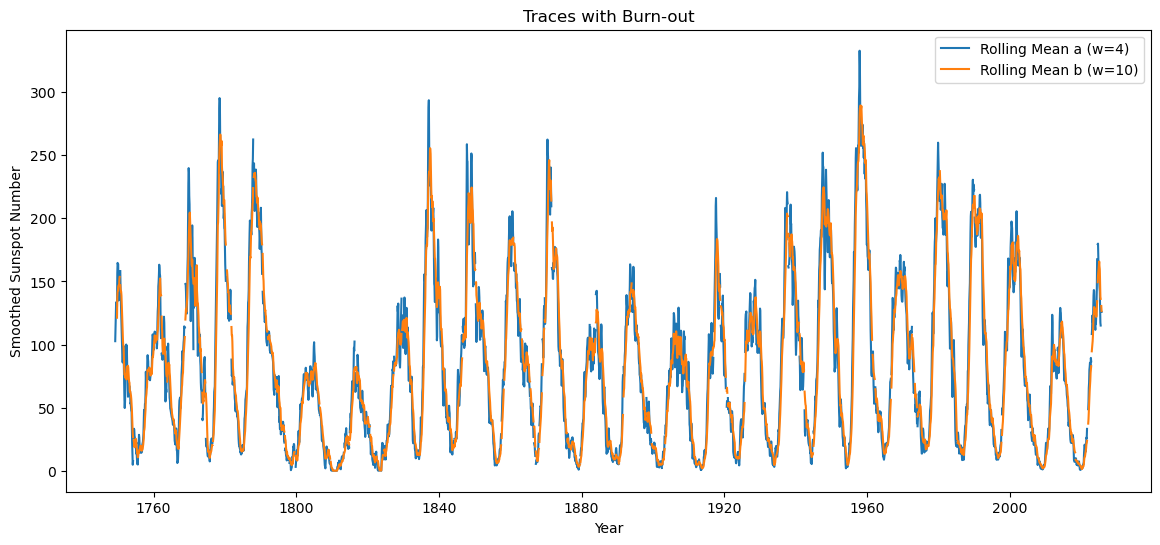

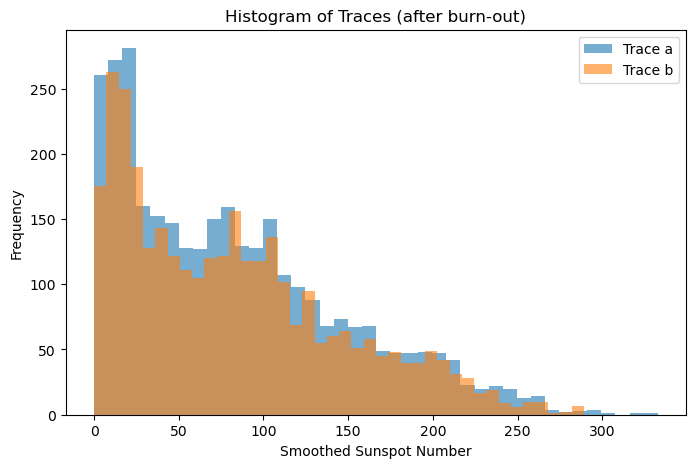

In [7]:
a_trace = df['SunspotNum'].rolling(window=4).mean()
b_trace = df['SunspotNum'].rolling(window=10).mean()

burn_idx = np.random.choice(np.arange(len(df)), size=int(0.03*len(df)), replace=False)
a_trace[burn_idx] = np.nan
b_trace[burn_idx] = np.nan

plt.figure(figsize=(14,6))
plt.plot(df['Date'], a_trace, label='Rolling Mean a (w=4)')
plt.plot(df['Date'], b_trace, label='Rolling Mean b (w=10)')
plt.title('Traces with Burn-out')
plt.xlabel('Year')
plt.ylabel('Smoothed Sunspot Number')
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
plt.hist(a_trace.dropna(), bins=40, alpha=0.6, label='Trace a')
plt.hist(b_trace.dropna(), bins=40, alpha=0.6, label='Trace b')
plt.title('Histogram of Traces (after burn-out)')
plt.xlabel('Smoothed Sunspot Number')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Step 6: Prediction—Next Cycle Peak Timing

Detect peaks in rolling mean traces (e.g., a_trace) to estimate cycle max timing.

Detected peak dates: 7     1749-08-01
144   1761-01-01
340   1777-05-01
475   1788-08-01
648   1803-01-01
Name: Date, dtype: datetime64[ns]


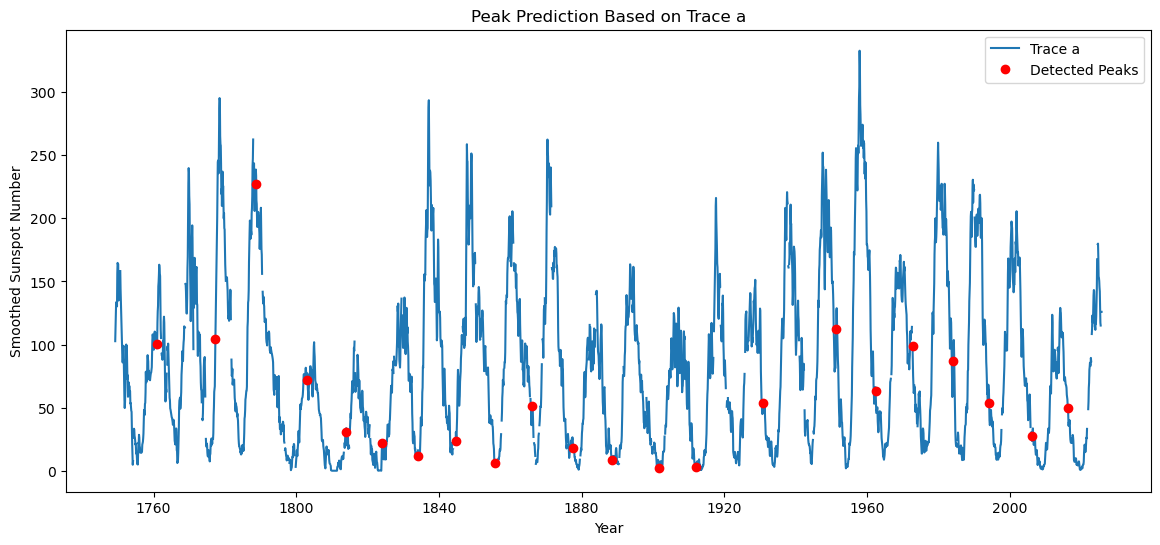

In [8]:
peaks, _ = find_peaks(a_trace.dropna(), distance=120)  # at least 10 years between peaks
peak_dates = df['Date'].iloc[peaks]
print("Detected peak dates:", peak_dates[:5])

plt.figure(figsize=(14,6))
plt.plot(df['Date'], a_trace, label='Trace a')
plt.plot(df['Date'].iloc[peaks], a_trace.iloc[peaks], 'ro', label='Detected Peaks')
plt.title('Peak Prediction Based on Trace a')
plt.xlabel('Year')
plt.ylabel('Smoothed Sunspot Number')
plt.legend()
plt.show()